## Table of contents

1. [Exercise 1](#ex1)
2. [Exercise 2](#ex2)
3. [Exercise 3](#ex3)
4. [Exercise 4](#ex4)
5. [Exercise 5](#ex5)
6. [Exercise 6](#ex6)
7. [Exercise 7](#ex7)
8. [Exercise 8](#ex8)
9. [Exercise 9](#ex9)
10. [Exercise 10](#ex10)

In [2]:
from scipy.io import loadmat

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from scipy import stats

RANDOM_SEED = 123

In [3]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams['agg.path.chunksize'] = 10000

In [4]:
def Poisson_spike_generator(firing_rate, time, time_step, refrac_period=None):
    firing_rate = firing_rate * 0.001
    x = np.linspace(0, time, time_step+1)
    if refrac_period == None:
        y = np.random.poisson(firing_rate, time_step+1)
    else:
        y = []
        while len(y) < len(x):
            y.append(np.random.poisson(firing_rate, 1)[0])
            if y[-1] > 0:
                firing_rate = 0
            else:
                firing_rate += refrac_period
    y = np.array(y)
    y[y>1] = 1
    return x,y


def get_FanoFactor(spikes, interval):
    count = []
    init = 0
    i = interval
    while i < len(spikes):
        count.append(np.sum(spikes[init:i]))
        init = i
        i += interval
    
    FanoFactor = np.var(count)/np.mean(count)
    return round(FanoFactor, 4)


def plot_spikes(x, y, lower_limit=0, upper_limit=1, title='Poisson Spike Train'):
    plt.figure(figsize=(20,3))
    xcoords = x[y>0]
    for xc in xcoords:
        plt.axvline(xc, color='black')
    plt.yticks([0,1])
    plt.xlim(lower_limit,upper_limit)
    plt.xlabel('Time, s')
    plt.title(title)
    plt.show()
    
    
def plot_autorrelation_function(y, upper_limit, upper_ylim=1200, title='Autocorrelation Function'):
    AotuCorr = np.correlate(y, y, mode='full')
    middle_point = int(len(AotuCorr)/2)
    AotuCorr = AotuCorr[middle_point:middle_point+upper_limit]
    x = np.linspace(0,upper_limit,upper_limit)
    plt.figure(figsize=(10,4))
    plt.bar(x,AotuCorr)
    plt.ylim(0,upper_ylim)
    plt.xlabel('Time, ms')
    plt.title(title)
    plt.show()

## Exercise 1 <a name="ex1"></a>

Generate spikes for 10 s (or longer if you want better statistics) using a Poisson spike generator with a constant rate of 100 Hz, and record their times of occurrence. Compute the coefficient of variation of the interspike intervals, and the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms. Plot the interspike interval histogram.

In [25]:
T = 10 # time, 10 seconds
r = 100 # firing rate, 100 Hz
time_step = 0.01 # seconds
n = int(T/time_step) # 

time_scale = np.linspace(start=0, stop=T, num=n)

In [32]:
r*T

1000

In [31]:
np.random.poisson(1, n)

array([3, 0, 0, ..., 1, 0, 0])

Time of occurrence: 984 (of 10001).


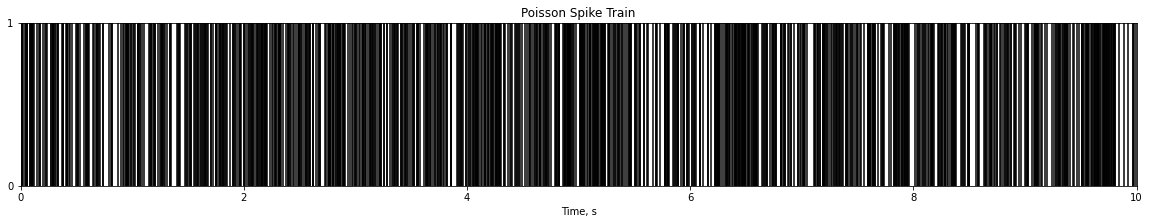

In [27]:
r = 100 # firing rate, Hz
T = 10 # time, s
n = int(T*1e3) # 1 ms step
x, y = Poisson_spike_generator(
    firing_rate=r,
    time=T,
    time_step=n
)

print('Time of occurrence: {} (of {}).'.format(np.sum(y), len(y)))

plot_spikes(
    x=x,
    y=y,
    lower_limit=0,
    upper_limit=10
)

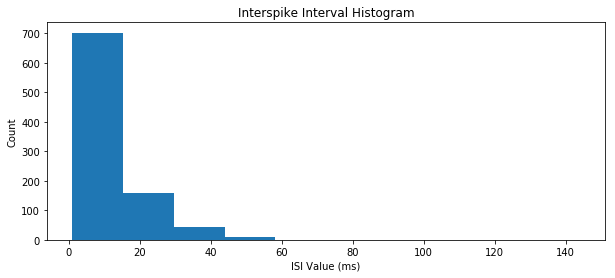

In [6]:
ISI = np.diff(x[y>0])*1e3

plt.figure(figsize=(10,4))
plt.hist(ISI)
plt.title('Interspike Interval Histogram')
plt.ylabel('Count')
plt.xlabel('ISI Value (ms)')
plt.show()

In [7]:
intervals = [1,10,50,100]
for interval in intervals:
    print('Fano factor for {} ms window: {}.'.format(interval, get_FanoFactor(spikes=y, interval=interval)))

Fano factor for 1 ms window: 0.9085.
Fano factor for 10 ms window: 0.8784.
Fano factor for 50 ms window: 0.943.
Fano factor for 100 ms window: 1.1418.


## Exercise 2 <a name="ex2"></a>

Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time. Initially, set the firing rate to a constant value, $r(t) = r_0$. After every spike, set $r(t)$ to 0, and then allow it to recover exponentially back to $r_0$ with a time constant $\tau_{ref}$ that controls the refractory recovery rate. In other words, have $r(t)$ obey the equation:

\begin{equation*} \tau_{\text{ref}} \frac{d}{dt}r = r_0 - r
\end{equation*}

except immediately after a spike, when it is set to 0. Plot the coefficient of variation as a function of $\tau_{ref}$ over the range $1ms≤ \tau_{ref} ≤20ms$, and plot interspike interval histograms for a few different values of $\tau_{ref}$ in this range. Compute the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms for the case $\tau_{ref}$=10ms.

Time of occurrence: 736 (of 10001).


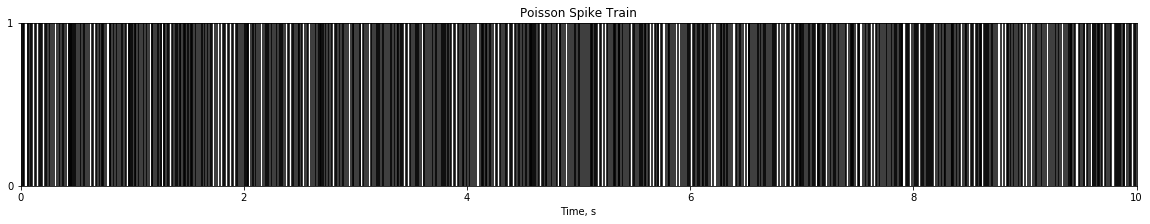

In [8]:
r = 100 # firing rate r_0, Hz
r_s = r/10000 # 
T = 10 # time, s
n = int(T*1e3) # 1 ms step
tau_ref = 0.01

x, y = Poisson_spike_generator(
    firing_rate=r,
    time=T,
    time_step=n,
    refrac_period=tau_ref
)

print('Time of occurrence: {} (of {}).'.format(np.sum(y), len(y)))

plot_spikes(
    x=x,
    y=y,
    lower_limit=0,
    upper_limit=10
)

In [9]:
intervals = [1,10,50,100]
for interval in intervals:
    print('Fano factor for {} ms window: {}.'.format(interval, get_FanoFactor(spikes=y, interval=interval)))

Fano factor for 1 ms window: 0.9269.
Fano factor for 10 ms window: 0.4715.
Fano factor for 50 ms window: 0.2834.
Fano factor for 100 ms window: 0.2919.


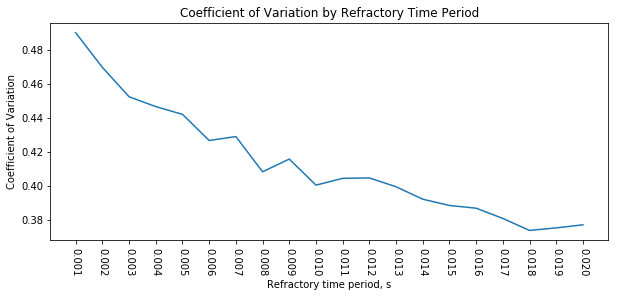

In [10]:
r = 100 # firing rate r_0, Hz
T = 10 # time, s
n = int(T*1e3) # 1 ms step
x = np.linspace(0, T, n+1)
CoefVar = []
tau_ref_range = np.arange(0.001, 0.021, 0.001)
ISI_dict = dict()

for tau_ref in tau_ref_range:
    r_s = r/10000 # 
    y = []
    while len(y) < len(x):
        y.append(np.random.poisson(r_s*T, 1)[0])
        if y[-1] > 0:
            r_s = 0
        else:
            r_s += tau_ref

    y = np.array(y)
    y[y>1] = 1
    
    ISI = np.diff(x[y>0])*1e3    
    CoefVar.append(np.std(ISI)/np.mean(ISI))
    
    if round(tau_ref,3) in [0.001, 0.01, 0.02]:
       ISI_dict[round(tau_ref,3)] = ISI
    
plt.figure(figsize=(10,4))
plt.plot(tau_ref_range, CoefVar)
plt.xticks(rotation=270)
plt.xticks(tau_ref_range)
plt.xlabel('Refractory time period, s')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation by Refractory Time Period')
plt.show()

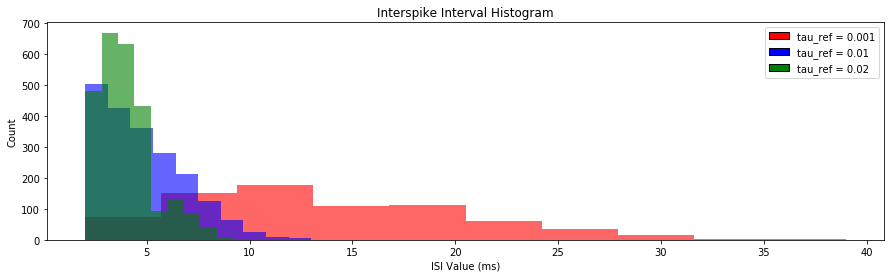

In [11]:
plt.figure(figsize=(15,4))
plt.hist(ISI_dict[0.001], color='r', alpha=0.6)
plt.hist(ISI_dict[0.01], color='b', alpha=0.6)
plt.hist(ISI_dict[0.02], color='g', alpha=0.6)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'b', 'g']]
labels = ["tau_ref = 0.001","tau_ref = 0.01", "tau_ref = 0.02"]
plt.legend(handles, labels)
plt.title('Interspike Interval Histogram')
plt.ylabel('Count')
plt.xlabel('ISI Value (ms)')
plt.show()

## Exercise 3 <a name="ex3"></a>

Compute autocorrelation histograms of spike trains generated by a Poisson generator with a constant firing rate of 100 Hz, a constant firing rate of 100 Hz together with a refractory period modeled as in exercise 2 with $\tau_{ref}$=10ms, and a variable firing rate $r(t)=100(1+cos(2πt/25ms))Hz$. Plot the histograms over a range from 0 to 100 ms.

In [12]:
def variable_firing_rate(time):
    return 100*(1+np.cos(2*np.pi*(time/25)))


r = 100 # firing rate, Hz
T = 10 # time, s
n = int(T*1e3) # 1 ms step
tau_ref = 0.01

x_c, y_c = Poisson_spike_generator(
    firing_rate=r,
    time=T,
    time_step=n
)

x_r, y_r = Poisson_spike_generator(
    firing_rate=r,
    time=T,
    time_step=n,
    refrac_period=tau_ref
)

x_v = x_c.copy()
y_v = []
for time in x_v:
    y_v.append(np.random.poisson(variable_firing_rate(time)*0.001, 1)[0])
    
y_v = np.array(y_v)
y_v[y_v>1] = 1

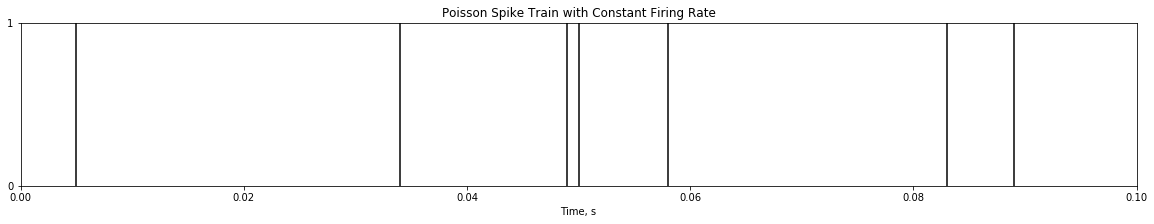

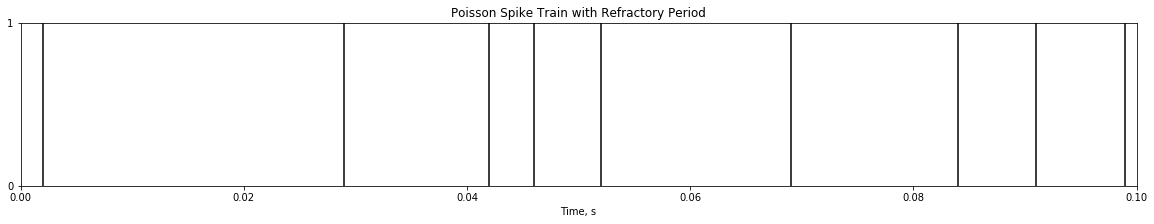

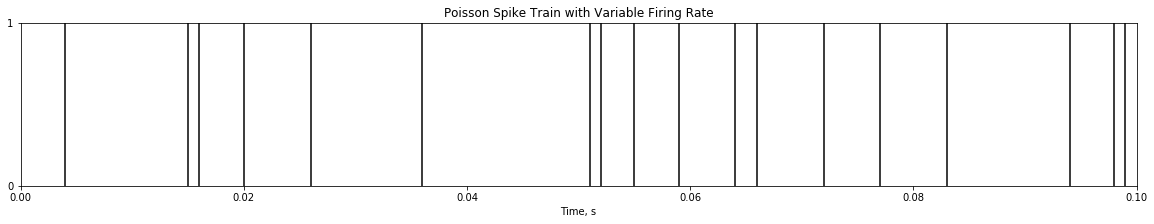

In [13]:
plot_spikes(
    x=x_c,
    y=y_c,
    lower_limit=0,
    upper_limit=0.1,
    title='Poisson Spike Train with Constant Firing Rate'
)

plot_spikes(
    x=x_r,
    y=y_r,
    lower_limit=0,
    upper_limit=0.1,
    title='Poisson Spike Train with Refractory Period'
)

plot_spikes(
    x=x_v,
    y=y_v,
    lower_limit=0,
    upper_limit=0.1,
    title='Poisson Spike Train with Variable Firing Rate'
)

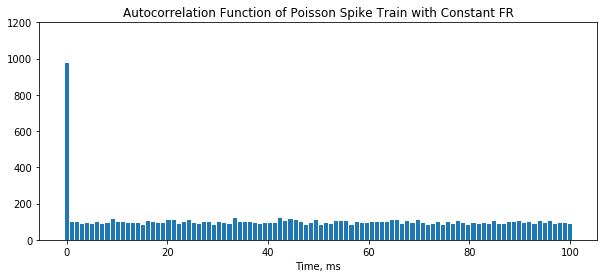

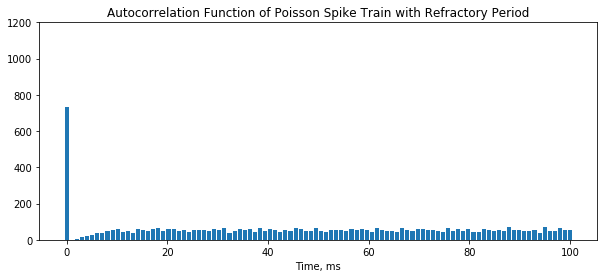

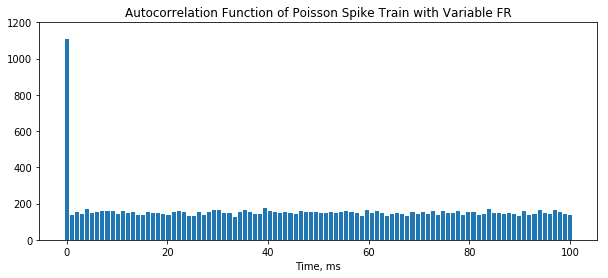

In [14]:
plot_autorrelation_function(y=y_c,upper_limit=100,title='Autocorrelation Function of Poisson Spike Train with Constant FR')
plot_autorrelation_function(y=y_r,upper_limit=100,title='Autocorrelation Function of Poisson Spike Train with Refractory Period')
plot_autorrelation_function(y=y_v,upper_limit=100,title='Autocorrelation Function of Poisson Spike Train with Variable FR')

## Exercise 4 <a name="ex4"></a>

Generate a Poisson spike train with a time-dependent firing rate $r(t) = 100(1+ cos(2\pi t/300 ms)) Hz$. Approximate the firing rate from this spike train using a variable $r_{approx}$ that satisfies 

$\tau_{approx} * (dr_{approx} / dt) = -r_{approx}$ ,
    
except that $r_{approx} -> r_{approx} + 1/\tau_{approx}$ every time a spike occurs.

* Make plots of the true rate, the spike sequence generated, and the estimated rate. 
* Experiment with a few different values of $\tau_{approx}$ in the range of 1 to 100 ms. 
* Determine the best value of $\tau_{approx}$ by computing the average squared error of the estimate, $\int dt(r(t) - r_{approx}(t))^2$, for different values of $\tau_{approx}$, and finding the value of Tauapprox that minimizes this error.

## Exercise 5 <a name="ex5"></a>

For a constant rate Poisson process, every specific (up to a finite resolution) sequence of $N$ spikes occurring over a given time interis equally likely. This seems paradoxical because we certainly do not expect to see all $N$ spikes appearing within the first 1% of the time interval. Resolve this paradox.

In [181]:
r = 100 # Hz
Poisson_prob = poisson.pmf(1,r*0.001)
print('For a Poisson process with firing rate r=100 Hz we expect to see {} spikes within 1 second or {} spikes within 1 ms range.'.format(
    int(Poisson_prob*1000), 
    round(Poisson_prob,3)
))

For a Poisson process with firing rate r=100 Hz we expect to see 90 spikes within 1 second or 0.09 spikes within 1 ms range.


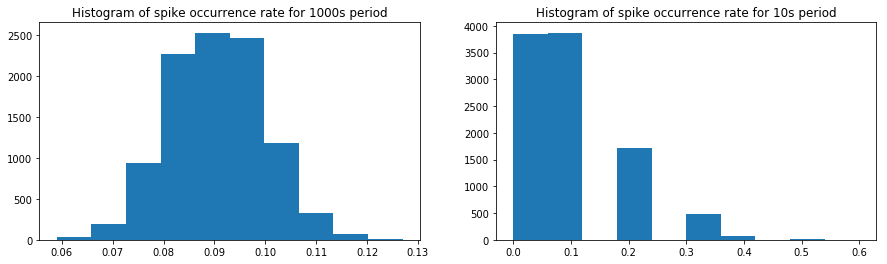

In [179]:
time_interval = 1000 # ms
n_trials = 10000
spikeRate_all = []
spikeRate_firstPercent = []
firstPercent = int(time_interval*0.01)
for i in range(n_trials):
    y = binom.rvs(1, Poisson_prob, size=time_interval)
    spikeRate_all.append(np.mean(y))
    spikeRate_firstPercent.append(np.mean(y[:firstPercent]))
    
plt.figure(figsize=(15,4))
plt.subplot(121)    
plt.hist(spikeRate_all)
plt.title('Histogram of spike occurrence rate for {}s period'.format(time_interval))
plt.subplot(122)    
plt.hist(spikeRate_firstPercent)
plt.title('Histogram of spike occurrence rate for {}s period'.format(firstPercent))
plt.show()

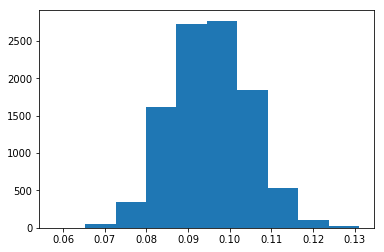

In [162]:
prob = []
for i in range(n_trials):
    y = np.random.poisson(r*0.001, time_interval)
    y = np.array(y)
    y[y>1] = 1
    prob.append(np.mean(y))
plt.hist(prob)
plt.show()

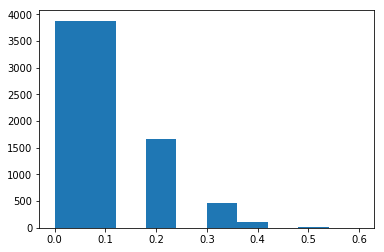

In [63]:
prob = []
for i in range(n_trials):
    Poisson_prob = poisson.pmf(1,r*0.001)
    y = binom.rvs(1, Poisson_prob, size=int(time_interval*0.01))
    prob.append(np.mean(y))
    
plt.hist(prob)
plt.show()

## Exercise 6 <a name="ex6"></a>

Build an approximate white-noise stimulus by choosing random values at discrete times separated by a time-step interval $\Delta t$. Plot its autocorrelation function and power spectrum. Discuss how well this stimulus matches an ideal white-noise stimulus given the value of $\Delta t$ you used.

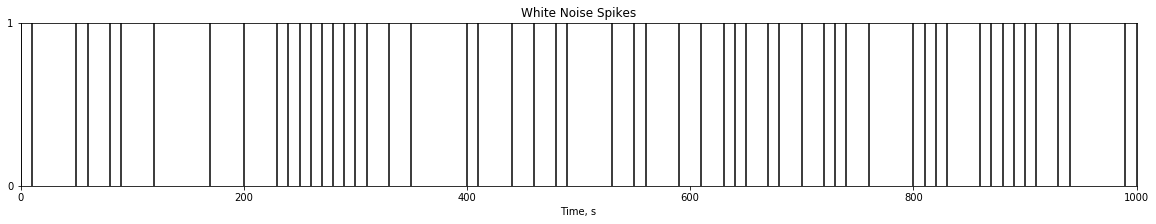

In [9]:
delta_t = 10 # 10 ms
T = int(1*1e3) # 1 s = 1000 ms
x = np.arange(0, T+delta_t, delta_t)
mean = 0
std = 50 
WN = []
for time in x:
    if np.random.normal(mean, std, size=1) > 0:
        WN.append(1)
    else:
        WN.append(0)

WN = np.array(WN)
plot_spikes(x, WN, 0, T, title='White Noise Spikes')

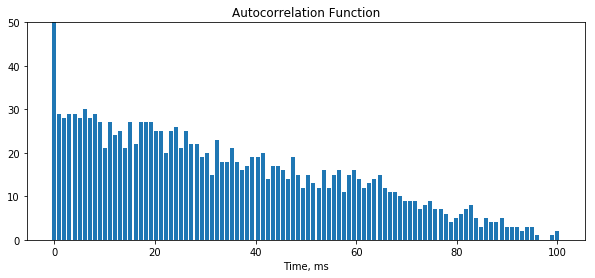

In [10]:
plot_autorrelation_function(WN, 100, 50)

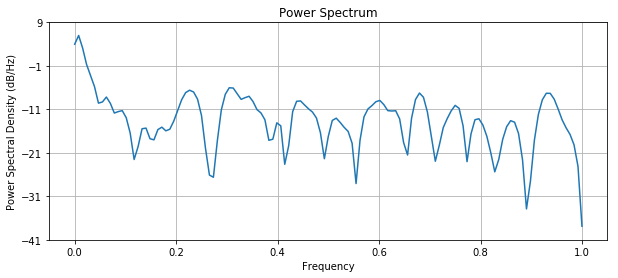

In [11]:
plt.figure(figsize=(10,4))
plt.psd(WN)
plt.title('Power Spectrum')
plt.show()

## Exercise 7 <a name="ex7"></a>



## Exercise 8 <a name="ex8"></a>

`matlab®` file `c1p8.mat` contains data collected and provided by Rob de Ruyter van Steveninck from a fly H1 neuron responding to an approximate white-noise visual motion stimulus. Data were collected for 20 minutes at a sampling rate of 500 Hz. In the file, `rho` is a vector that gives the sequence of spiking events or nonevents at the sampled times (every 2 ms). When an element of `rho` is one, this indicates the presence of a spike at the corresponding time, whereas a zero value indicates no spike. The variable `stim` gives the sequence of stimulus values at the sampled times. Calculate and plot the spike-triggered average from these data over the range from 0 to 300 ms (150 time steps). (Based on a problem from Sebastian Seung.)

In [4]:
mat = loadmat('data/c1p8.mat', squeeze_me=True)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Thu Feb 15 15:13:45 2001',
 '__version__': '1.0',
 '__globals__': [],
 'rho': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'stim': array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625])}

In [29]:
time = np.arange(0, len(mat['rho']), 1)
spikes = mat['rho']
stimulus = mat['stim']

spike_time = time[spikes == 1]

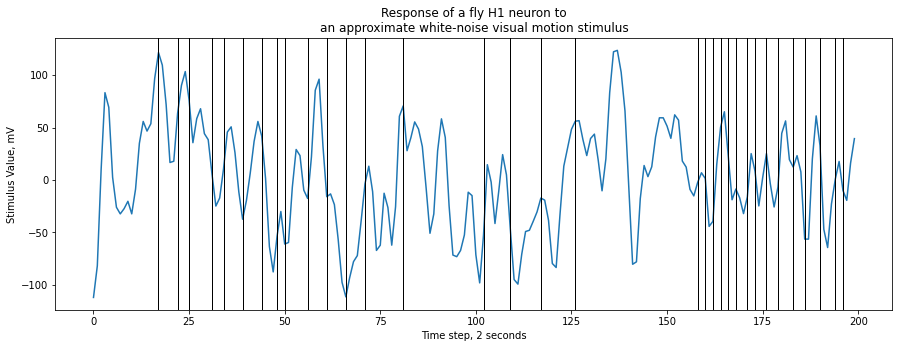

In [78]:
n = 200

plt.figure(figsize=[15,5])
plt.plot(time[:n], stimulus[:n])
for st in spike_time:
    if st >= n:
        break
    else:
        plt.axvline(st, color='black', linewidth=1)
    
plt.xlabel('Time step, 2 seconds')
plt.ylabel('Stimulus Value, mV')
plt.title('Response of a fly H1 neuron to\nan approximate white-noise visual motion stimulus')
plt.show()

In [32]:
window = 150

In [57]:
np.random.seed(RANDOM_SEED)
rand_ints = np.random.randint(low=0, high=len(spike_time), size=9)

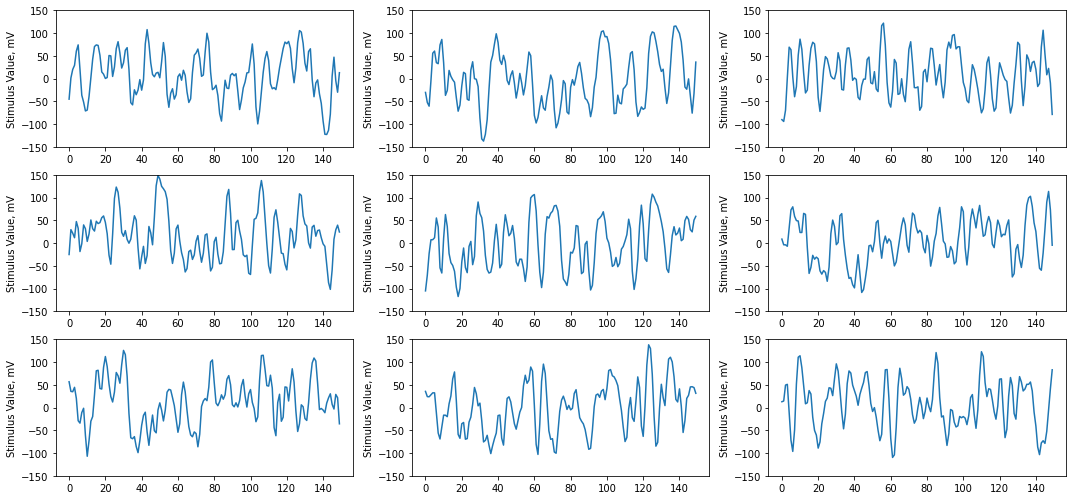

In [79]:
plt.figure(figsize=(15,7))

for (i, index) in enumerate(rand_ints):
    plt.subplot(3,3,i+1)
    end_index = spike_time[index]
    start_index = end_index - window
    sample = stimulus[start_index:end_index]
    
    plt.plot(sample)
    plt.ylim([-150,150])
    plt.ylabel('Stimulus Value, mV')

plt.tight_layout()
plt.show()    

In [72]:
sta = np.zeros((window,))
for end_index in spike_time[spike_time>window]:
    start_index = end_index - window
    sample = stimulus[start_index:end_index]
    sta += sample
    
sta /= len(spike_time[spike_time>window])

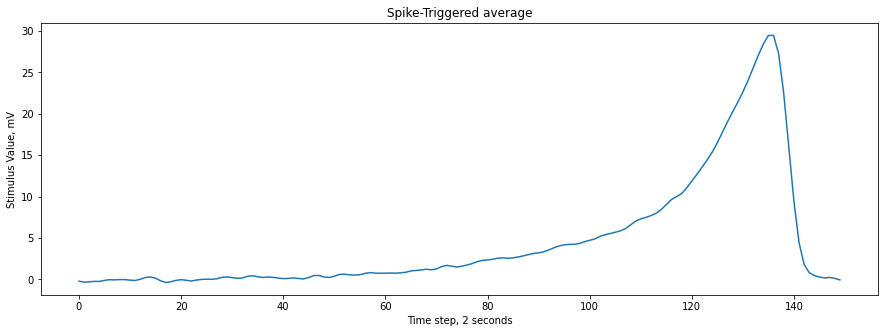

In [77]:
plt.figure(figsize=(15,5))
plt.plot(sta)
plt.title('Spike-Triggered average')
plt.ylabel('Stimulus Value, mV')
plt.xlabel('Time step, 2 seconds')
plt.show()

## Exercise 9 <a name="ex9"></a>

Using the data of problem 8, calculate and plot stimulus averages triggered on events consisting of a pair of spikes (which need not necessarily be adjacent) separated by a given interval (as in figure 1.10). Plot these two-spike-triggered average stimuli for various separation intervals ranging from 2 to 100 ms. Plot, as a function of the separation between the two spikes, the magnitude of the difference between the two-spike-triggered average and the sum of two single-spike-triggered averages (obtainein exercise 8) separated by the same time interval. At what temporal separation does this difference become negligibly small? (Based on a problem from Sebastian Seung.)

In [21]:
spikes = mat['rho']
stimVals = mat['stim']
n_timeSteps = 150
spikeTimes = spikes[n_timeSteps:].nonzero()[0] + n_timeSteps

sepInterval = np.array([2,20,40,60,80,100])
sepInterval = (sepInterval/2).astype('int')
print('Time intervals:', sepInterval, 'steps')

Time intervals: [ 1 10 20 30 40 50] steps


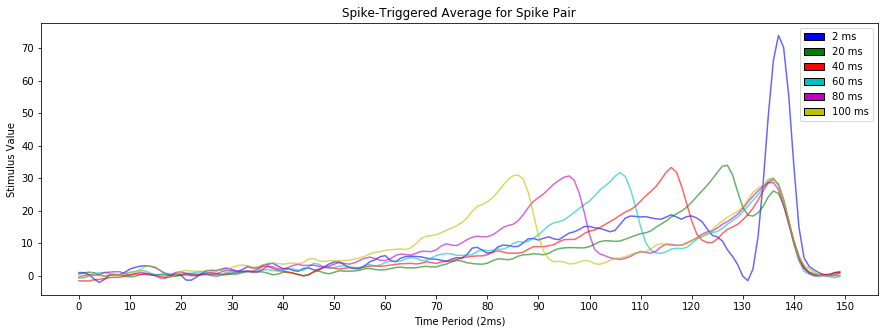

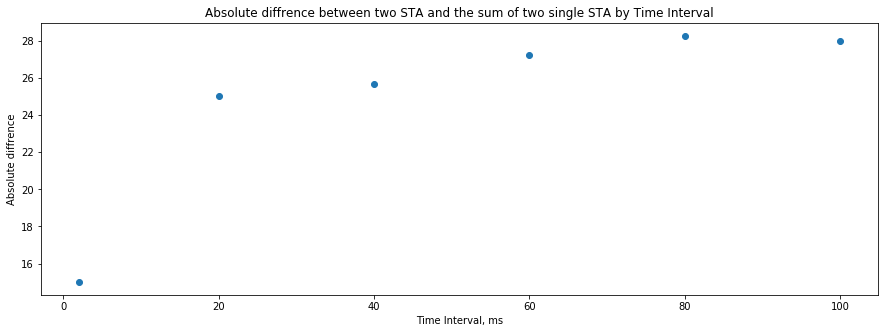

In [22]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors]
labels = [str(int(x*2)) + ' ms' for x in sepInterval]
MAX_SINGLE_RESPONSE = 29.472907029165032
diff_dict = dict()

j = 0
plt.figure(figsize=(15,5))
for interval in sepInterval:
    spikePairs = []
    i = 0
    while i < len(spikeTimes) - 1:
#         if abs(np.diff([spikeTimes[i+1], spikeTimes[i]])[0]) in range(interval-1, interval+1):
#             spikePairs.append(spikeTimes[i+1]) 
        if spikeTimes[i] + interval in spikeTimes:
            spikePairs.append(spikeTimes[np.argwhere(spikeTimes == spikeTimes[i] + interval)[0][0]])
        i += 1

    spikePairs = np.array(spikePairs)
    
    sta = np.zeros((n_timeSteps,))
    n_spikes = len(spikePairs)
    for sp_time in spikePairs:
        sta += stimVals[sp_time-n_timeSteps:sp_time]

    sta /= n_spikes
    diff_dict[interval*2] = abs(max(sta) - 2*MAX_SINGLE_RESPONSE)

    plt.plot(sta, c=colors[j], alpha=0.6)
    j += 1

plt.title('Spike-Triggered Average for Spike Pair')
plt.xlabel('Time Period (2ms)')
plt.ylabel('Stimulus Value')
plt.xticks(np.arange(0, 160, 10))
plt.legend(handles, labels)
plt.show()


plt.figure(figsize=(15,5))
plt.scatter(diff_dict.keys(), diff_dict.values())
plt.xlabel('Time Interval, ms')
plt.ylabel('Absolute diffrence')
plt.title('Absolute diffrence between two STA and the sum of two single STA by Time Interval')
plt.show()

## Excercise 10 <a name="ex10"></a>

Using the data of problem 8, find the spike-triggered average stimulus for events that contain exactly two adjacent spikes separated by various different intervals ranging from 2 to 100 ms (e.g. for 4 ms, the event [1 0 1] but not the event [1 1 1]). This is distinct from exercise 9 in which we only required two spikes separated by a given interval, but did not restrict what happened between the two spikes. Compare results of the exclusive case considered here with those of the inclusive two-spike-triggered average computed in exercise 9. In what ways and why are they different? (Based on a problem from Sebastian Seung.)

In [23]:
spikes = mat['rho']
stimVals = mat['stim']
n_timeSteps = 150
spikeTimes = spikes[n_timeSteps:].nonzero()[0] + n_timeSteps

sepInterval = np.array([2,20,40,60,80,100])
sepInterval = (sepInterval/2).astype('int')
print('Time intervals:', sepInterval, 'steps')

Time intervals: [ 1 10 20 30 40 50] steps


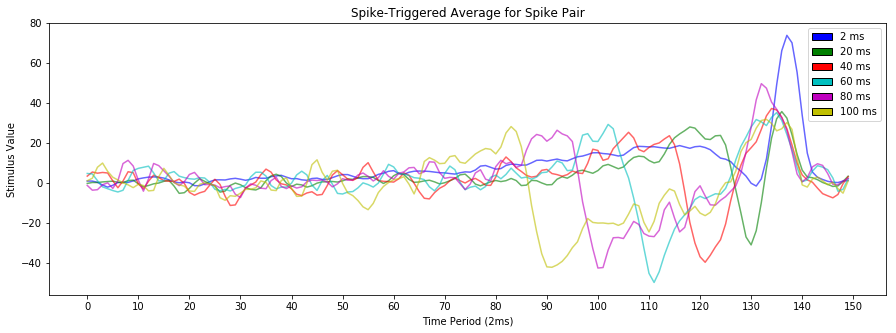

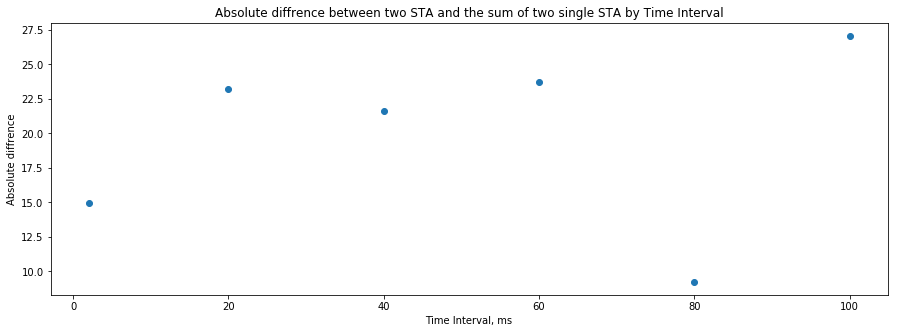

In [24]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors]
labels = [str(int(x*2)) + ' ms' for x in sepInterval]
MAX_SINGLE_RESPONSE = 29.472907029165032
diff_dict = dict()

j = 0
plt.figure(figsize=(15,5))
for interval in sepInterval:
    spikePairs = []
    i = 0
    while i < len(spikeTimes) - 1:
        if spikeTimes[i+1] - spikeTimes[i] == interval:
            spikePairs.append(spikeTimes[i+1]) 
#         if spikeTimes[i] + interval in spikeTimes:
#             spikePairs.append(spikeTimes[np.argwhere(spikeTimes == spikeTimes[i] + interval)[0][0]])
        i += 1

    spikePairs = np.array(spikePairs)
    
    sta = np.zeros((n_timeSteps,))
    n_spikes = len(spikePairs)
    for sp_time in spikePairs:
        sta += stimVals[sp_time-n_timeSteps:sp_time]

    sta /= n_spikes
    diff_dict[interval*2] = abs(max(sta) - 2*MAX_SINGLE_RESPONSE)

    plt.plot(sta, c=colors[j], alpha=0.6)
    j += 1

plt.title('Spike-Triggered Average for Spike Pair')
plt.xlabel('Time Period (2ms)')
plt.ylabel('Stimulus Value')
plt.xticks(np.arange(0, 160, 10))
plt.legend(handles, labels)
plt.show()


plt.figure(figsize=(15,5))
plt.scatter(diff_dict.keys(), diff_dict.values())
plt.xlabel('Time Interval, ms')
plt.ylabel('Absolute diffrence')
plt.title('Absolute diffrence between two STA and the sum of two single STA by Time Interval')
plt.show()